In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
## Linear Regression
from sklearn.linear_model import LogisticRegression
## Decision Tree
from sklearn.tree import DecisionTreeClassifier
## Random Forest
from sklearn.ensemble import RandomForestClassifier
## SVM - Support Vector Machine
from sklearn import svm
## KNN
from sklearn.neighbors import KNeighborsClassifier
## Voting - use to combine best 4 models to have a better prediction
from sklearn.ensemble import VotingClassifier

Does it has NA values in train dataset - False
Does it has NA values in test dataset - False
Plot example of each beat type


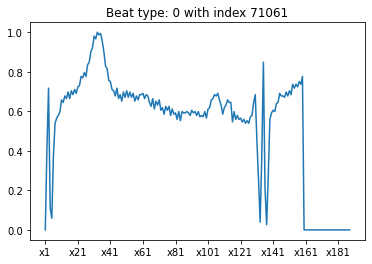

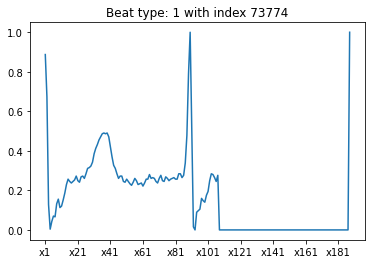

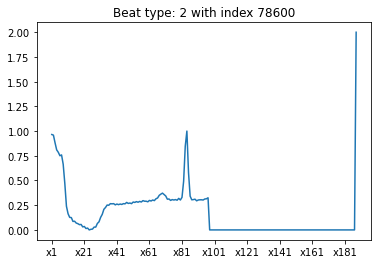

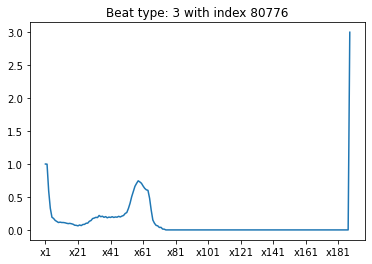

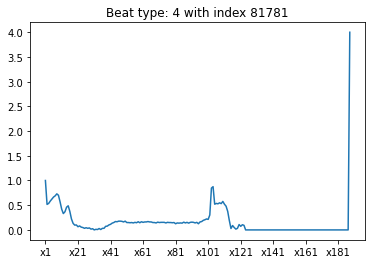

In [3]:
## Create a list contains of all column names
lst=[]
for i in range(1,188):
  lst.append('x{}'.format(str(i)))
lst.append('beat_type')

## Import dataset
x_train = pd.read_csv('/content/gdrive/MyDrive/Datasets/Smart_Health/mitbih_train.csv', header= None, names = lst)
x_test = pd.read_csv('/content/gdrive/MyDrive/Datasets/Smart_Health/mitbih_test.csv', header = None, names = lst)

## Since this is a large dataset, check if any null values exist
print('Does it has NA values in train dataset -', x_train.isnull().values.any())
print('Does it has NA values in test dataset -', x_test.isnull().values.any())
print('Plot example of each beat type')
##Plot observation for each type of beat:
list_rec=[]
for item in np.unique(x_train['beat_type']):
  rec =  x_train.loc[x_train['beat_type']== item].sample(n=1)
  list_rec.append(rec.index.values)

list_index=[]
for item in list_rec:
  for i in item:
    list_index.append(i)

for i,item in enumerate(list_index):
  plt.plot(x_train[item:item+1].T)
  plt.xticks(np.arange(0,188, step=20))
  plt.title('Beat type: {} with index {}'.format(i, item))
  plt.show()

## Pop the label out of observation dataset
y_train = x_train['beat_type']
del x_train['beat_type']

y_test = x_test['beat_type']
del x_test['beat_type']

In [4]:
x_train.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,...,x148,x149,x150,x151,x152,x153,x154,x155,x156,x157,x158,x159,x160,x161,x162,x163,x164,x165,x166,x167,x168,x169,x170,x171,x172,x173,x174,x175,x176,x177,x178,x179,x180,x181,x182,x183,x184,x185,x186,x187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,0.198778,0.203550,0.208776,0.212885,0.218393,0.224966,0.231377,0.237123,0.242582,0.247923,0.253749,0.259748,0.266244,0.272734,0.279355,0.285588,0.291808,0.297672,0.303384,0.308795,0.313890,0.318454,0.322087,0.324891,0.326737,0.327817,0.327931,0.326746,0.324326,0.320537,...,0.031857,0.030729,0.029582,0.028531,0.027573,0.026875,0.025771,0.024823,0.023932,0.023060,0.022458,0.021809,0.021245,0.020623,0.020026,0.019534,0.019053,0.018592,0.017664,0.016740,0.015722,0.014402,0.013024,0.011625,0.010262,0.008929,0.008056,0.007278,0.006531,0.005981,0.005479,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,0.171796,0.176496,0.180274,0.184101,0.186963,0.190002,0.193899,0.198465,0.202855,0.207166,0.211187,0.214821,0.218450,0.221486,0.224031,0.225848,0.227133,0.227830,0.228436,0.228871,0.228760,0.228393,0.227472,0.226180,0.224659,0.223110,0.221352,0.219258,0.216884,0.214168,...,0.118013,0.116516,0.114463,0.112686,0.111103,0.110513,0.108566,0.106493,0.104591,0.102658,0.101395,0.100201,0.099386,0.098327,0.096635,0.095729,0.095368,0.095055,0.092902,0.091118,0.088574,0.084638,0.079949,0.075307,0.069892,0.063994,0.060074,0.056404,0.052840,0.050006,0.046693,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,0.070543,0.069182,0.068293,0.067744,0.070175,0.072993,0.074803,0.075972,0.076923,0.077872,0.079442,0.081911,0.085938,0.090032,0.094595,0.098901,0.103960,0.109348,0.114754,0.120730,0.127946,0.135962,0.144295,0.151852,0.157895,0.161035,0.161133,0.159383,0.157343,0.155388,...,0.000000,0.000000,0.000000,0.000000,0.000

In [5]:
#N- Normal beat -- 0
#S- Supraventricular premature beat -- 1
#V- Premature ventricular contraction -- 2
#F- Fusion of ventricular and normal beat -- 3
#Q- Unclassifiable beat -- 4

### Create a function to plot and print out Confusion matrix
true = '_true'
pred = '_pred'
class_name = ['N', 'S', 'V', 'F', 'Q']
class_true = [x+true for x in class_name]
class_pred = [x+pred for x in class_name]

def confusion_mat(y_test, y_hat):
    matrix = confusion_matrix(y_test, y_hat)
    confusion_mat = pd.DataFrame(matrix, class_true, class_pred)
    print('Accuracy score: ', accuracy_score(y_test, y_hat))
    print('F1 score: ',f1_score(y_test, y_hat, average='macro'))
    plt.figure(figsize=(10,7))
    sns.heatmap(confusion_mat, cmap='Blues', annot=True, fmt='g')
## Create an empty dictionary to save accuracy score
best_model={}

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy score:  0.9117029051708386
F1 score:  0.6355411346621442


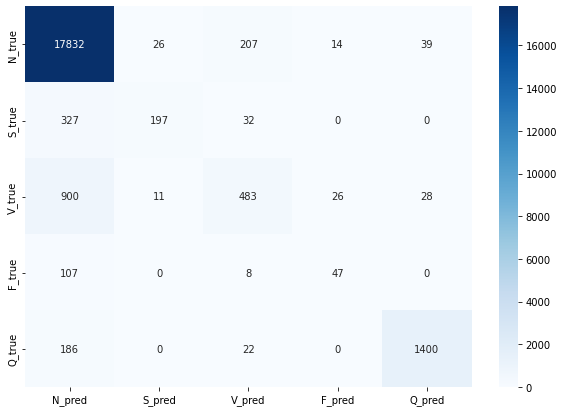

In [6]:
## Logistic regression
model = LogisticRegression().fit(x_train, y_train)
y_hat = model.predict(x_test)
confusion_mat(y_test, y_hat)
best_model['Logistic Regression'] = accuracy_score(y_test, y_hat)

Accuracy score:  0.9610359948839758
F1 score:  0.827340626428461


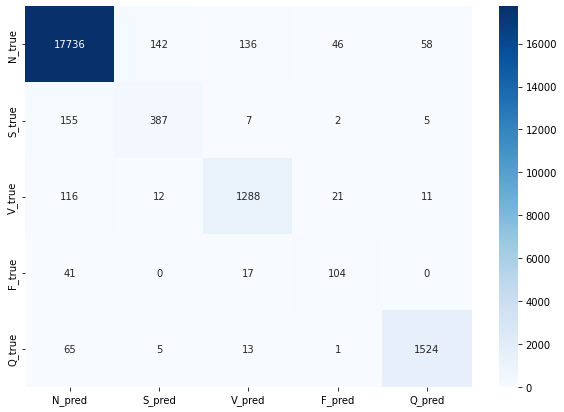

In [7]:
## Decision Tree
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train, y_train)
y_hat = model.predict(x_test)
confusion_mat(y_test, y_hat)
best_model['Decision Tree'] = accuracy_score(y_test, y_hat)

Accuracy score:  0.97464827334186
F1 score:  0.8718599767133546


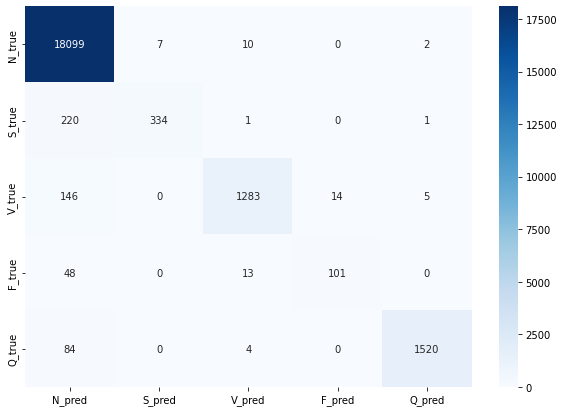

In [8]:
## Random Forest
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
y_hat = model.predict(x_test)
confusion_mat(y_test, y_hat)
best_model['Random Forest Classifier'] = accuracy_score(y_test, y_hat)

Accuracy score:  0.9680248492600037
F1 score:  0.8288503444173496


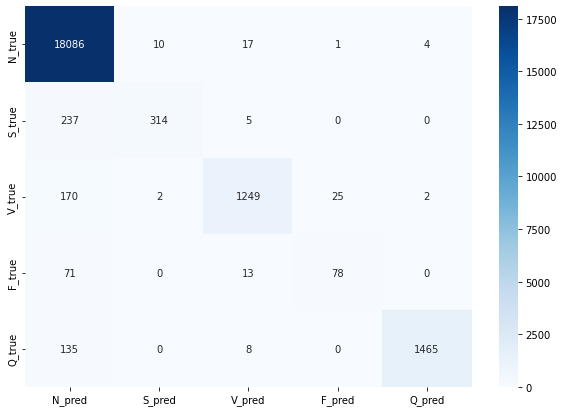

In [9]:
## Support Vector Machine
model = svm.SVC(kernel = 'rbf', probability=True)
model.fit(x_train, y_train)
y_hat = model.predict(x_test)
confusion_mat(y_test, y_hat)
best_model['Support Vector Machine'] = accuracy_score(y_test, y_hat)

Accuracy score:  0.9736433400328888
F1 score:  0.8640290940752031


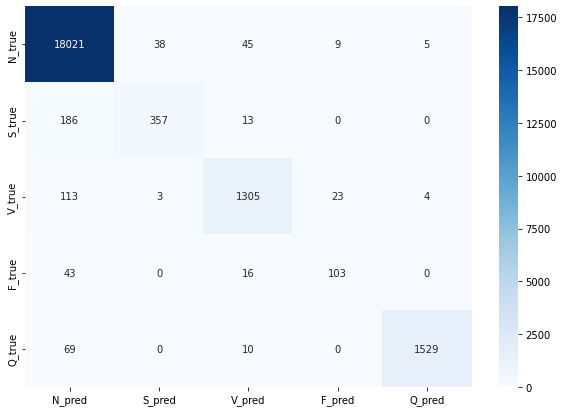

In [10]:
## KNN
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train) 
y_hat = model.predict(x_test)
best_model['K Nearest Neighbor'] = accuracy_score(y_test, y_hat)
confusion_mat(y_test, y_hat)

In [11]:
best_model

{'Decision Tree': 0.9610359948839758,
 'K Nearest Neighbor': 0.9736433400328888,
 'Logistic Regression': 0.9117029051708386,
 'Random Forest Classifier': 0.97464827334186,
 'Support Vector Machine': 0.9680248492600037}

In [12]:
choose_model = sorted(best_model, key = best_model.get, reverse=True)[:4]
choose_model

['Random Forest Classifier',
 'K Nearest Neighbor',
 'Support Vector Machine',
 'Decision Tree']

Accuracy score:  0.9772976429746026
F1 score:  0.8759354660062593


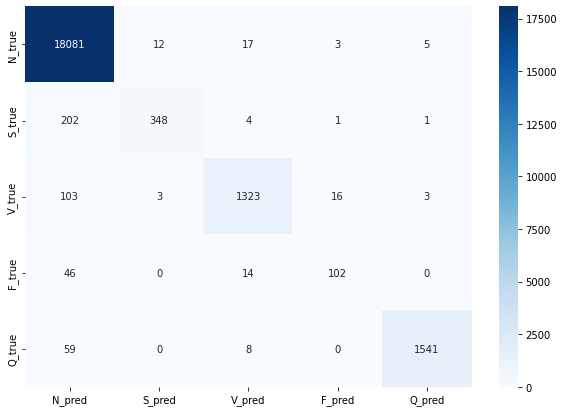

In [13]:
### VOTING WITH 4 MODELS
models = [('KNN',KNeighborsClassifier(n_neighbors=5)),
          ('Random Forest', RandomForestClassifier(n_estimators=100)),
          ('SVM', svm.SVC(kernel='rbf', probability=True)),
         ('Decision Tree', DecisionTreeClassifier(criterion='entropy'))]  

#create our voting classifier, inputting models
vot_soft = VotingClassifier(estimators = models, voting = 'soft')
vot_soft.fit(x_train, y_train)
y_hat = vot_soft.predict(x_test)
confusion_mat(y_test, y_hat)